# 3D Plotを連続描画するサンプル

0. **作図条件**
    * pandas
    * 3D
    * columは3列
    * 複数ファイルがあって、ファイルリードする毎に描画を更新する

1.   方法
    * pngを連続で出力
    * gifでまとめて
    * gifで表示

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import IPython.display as IPdisplay
import glob
from PIL import Image as PIL_Image
from images2gif import writeGif

pieces=[]
x=range(10)
for n in x:
    data = np.random.randn(6, 3)
    dft = pd.DataFrame(data, columns=list("XYZ"))
    dft['No']=n
    pieces.append(dft)
    
df = pd.concat(pieces, ignore_index=True)    
df.head()

,X,Y,Z,No
0,-0.160703,-0.983720,0.441830,0
1,0.360850,0.341789,0.798341,0
2,0.797566,1.132433,-0.458353,0
3,0.533788,-1.039266,-0.290821,0
4,-0.156226,0.729035,-1.289842,0


In [52]:
#animation.ArtistAnimation
#事前に用意してあるデータを描画
#animation.FuncAnimation
#随時データを更新する

#fig = plt.figure()
gif_filename='xx'
for n in x:
    dfp=df[df.No==n]
    fig = plt.figure().gca(projection='3d')
    fig.scatter(dfp['X'], dfp['Y'], dfp['Z'])
    fig = plt.gcf()
    fig.savefig('./images/' + gif_filename + '/img' + str(n).zfill(3) + '.png', bbox_inches='tight')
    plt.close(fig) 
gif_images= [PIL_Image.open(image_fn) for image_fn in glob.glob('./images/'+gif_filename+'/*.png')]
#print gif_images
file_path_name = './images/' + gif_filename + '.gif'
#writeGif(file_path_name, gif_images, duration=0.1)
#writeGif(file_path_name, gif_images)
#IPdisplay.Image(url=file_path_name)


TypeError: must be string or buffer, not None

In [27]:
%ls

20141026_OverShoot_Simulation.ipynb  20150830_MP4.ipynb
20150830_3D_PlotView.ipynb           images/


1.41348405385


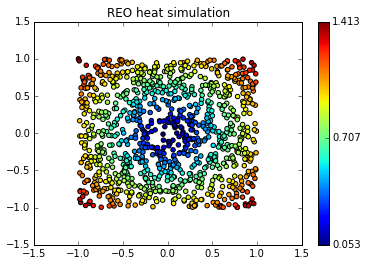

In [39]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-1, 1, 1000)
y = np.random.uniform(-1, 1, 1000)
z = np.sqrt(x*x+y*y)
print max(z)

fig, ax = plt.subplots()
ax.set_title('REO heat simulation')
cax = ax.scatter(x, y, c=z)
cbar = fig.colorbar(cax, ticks=[min(z), max(z)/2, max(z)], orientation='vertical')
#cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])
plt.show()